# Libraries

In [42]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

### Data Preparation & Preprocessing

In [43]:
# Load Dataset 

df = pd.read_csv('C:/Users/Leo/Downloads/Reviews.csv')
print(df.shape)
df = df.head(5000)
print(df.shape)

(568454, 10)
(5000, 10)


In [44]:
# Check Dataset Structure

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [45]:
# Basic Dataset Information

print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      5000 non-null   int64 
 1   ProductId               5000 non-null   object
 2   UserId                  5000 non-null   object
 3   ProfileName             5000 non-null   object
 4   HelpfulnessNumerator    5000 non-null   int64 
 5   HelpfulnessDenominator  5000 non-null   int64 
 6   Score                   5000 non-null   int64 
 7   Time                    5000 non-null   int64 
 8   Summary                 5000 non-null   object
 9   Text                    5000 non-null   object
dtypes: int64(5), object(5)
memory usage: 390.8+ KB
None


In [46]:
# Check for Missing Values

print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


In [47]:
# Summary Statistics of Numeric Features

print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                Id  HelpfulnessNumerator  HelpfulnessDenominator        Score  \
count  5000.000000           5000.000000             5000.000000  5000.000000   
mean   2500.500000              1.580200                2.067200     4.150400   
std    1443.520003              5.584533                6.288672     1.326549   
min       1.000000              0.000000                0.000000     1.000000   
25%    1250.750000              0.000000                0.000000     4.000000   
50%    2500.500000              0.000000                1.000000     5.000000   
75%    3750.250000              2.000000                2.000000     5.000000   
max    5000.000000            187.000000              216.000000     5.000000   

               Time  
count  5.000000e+03  
mean   1.294930e+09  
std    4.802063e+07  
min    9.617184e+08  
25%    1.271376e+09  
50%    1.309219e+09  
75%    1.330301e+09  
max    1.351210e+09  



Sentiment Distribution:


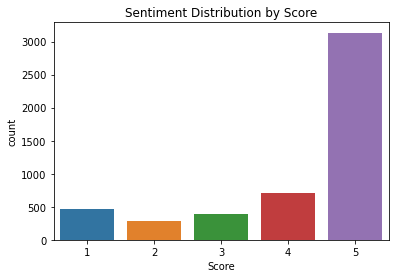

In [48]:
# Histogram Distribution of Score Sentiment

print("\nSentiment Distribution:")
sns.countplot(data=df, x='Score')
plt.title('Sentiment Distribution by Score')
plt.show()

In [50]:
from collections import Counter

# Tokenize and clean the text data

def tokenize_and_clean(text):
    
    # Tokenize the text into words and convert to lower case
    
    words = nltk.word_tokenize(text.lower())

    # Remove stopwords and non-alphabetic tokens
    
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.isalpha() and word not in stop_words]

    return words

# Apply tokenization and cleaning to the 'Text' column

df['cleaned_text'] = df['Text'].apply(tokenize_and_clean)

# Flatten the list of cleaned words

cleaned_words = [word for sublist in df['cleaned_text'] for word in sublist]

# Calculate word frequencies

word_freq = Counter(cleaned_words)

# Find the 10 most common word

top_10_words = word_freq.most_common(10)

# Display the top 10 most common words

for word, freq in top_10_words:
    print(f'{word}: {freq}')


br: 5301
like: 2027
good: 1761
great: 1468
taste: 1402
one: 1334
product: 1276
flavor: 1201
coffee: 1116
chips: 1070



Review Length Distribution:


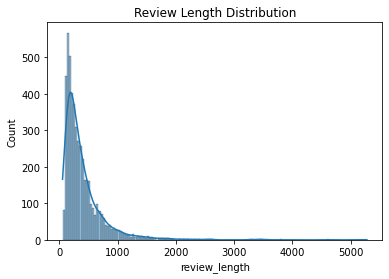

In [51]:
# Distribution of Review Lengths

df['review_length'] = df['Text'].apply(len)

print("\nReview Length Distribution:")
sns.histplot(data=df, x='review_length', kde=True)
plt.title('Review Length Distribution')
plt.show()

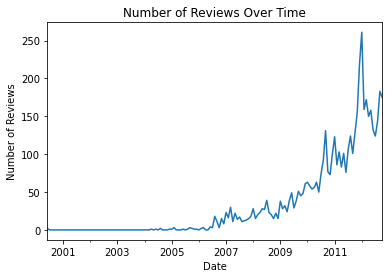

In [52]:
# Time Series Analysis
# Convert 'Time' column to datetime format

df['Time'] = pd.to_datetime(df['Time'], unit='s')

# Plot the number of reviews over time
df.set_index('Time', inplace=True)
df['Id'].resample('M').count().plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

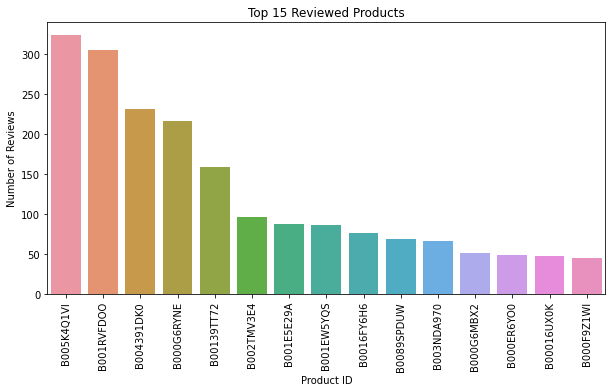

In [53]:
#Bar plot for top 15 reviewed product

top_n = 15
top_products = df['ProductId'].value_counts().head(top_n)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title(f'Top {top_n} Reviewed Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()


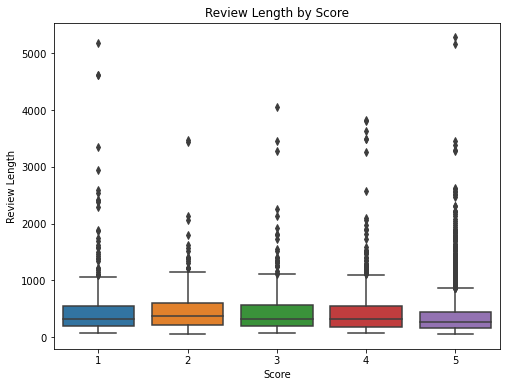

In [54]:
# Box plot of Review Length by Score

df['ReviewLength'] = df['Text'].apply(len)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Score', y='ReviewLength', data=df)
plt.title('Review Length by Score')
plt.xlabel('Score')
plt.ylabel('Review Length')
plt.show()

In [55]:
# Import VADER Sentiment Intensity Analyzer

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()


In [56]:
# Run the Polarity Score on the First 5000 Reviews Dataset

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [57]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [58]:
# Now we Have Sentiment Score and Metadata

vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,cleaned_text,review_length,ReviewLength
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,"[bought, several, vitality, canned, dog, food,...",263,263
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,"[product, arrived, labeled, jumbo, salted, pea...",190,190
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy...",509,509
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli...",219,219
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,Great taffy,Great taffy at a great price. There was a wid...,"[great, taffy, great, price, wide, assortment,...",140,140


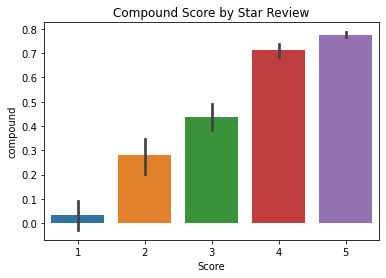

In [59]:
# Plotting the result in Compound Score



ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Star Review')
plt.show()

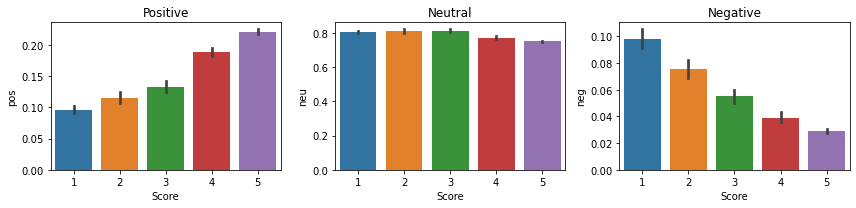

In [60]:
# Plotting in Positive, Neutral and Negative Score

fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

### Logistic Regression Model

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define labels based on star scores (4 or 5 stars as positive, 1 or 2 stars as negative)

df['Sentiment'] = df['Score'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')

# Split the data into training and testing sets

X = df['Summary']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a logistic regression model

model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Make predictions

y_pred = model.predict(X_test_vec)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(classification_rep)

Accuracy: 0.856
              precision    recall  f1-score   support

    Negative       0.77      0.52      0.62       225
    Positive       0.87      0.95      0.91       775

    accuracy                           0.86      1000
   macro avg       0.82      0.74      0.76      1000
weighted avg       0.85      0.86      0.85      1000



### Latent Dirichlet Allocation (LDA)

In [63]:
import pandas as pd
import numpy as np
import gensim
from gensim import corpora
from gensim.models import LdaModel
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Data Preprocessing

stop_words = set(stopwords.words('english'))

# Tokenize and clean the 'Summary' column

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word.lower() for word in tokens if word not in stop_words]
    return tokens

# Apply preprocessing to the 'Summary' column

df['cleaned_summary'] = df['Summary'].apply(preprocess_text)

# Create a dictionary and a corpus

dictionary = corpora.Dictionary(df['cleaned_summary'])
corpus = [dictionary.doc2bow(text) for text in df['cleaned_summary']]

# LDA Model Training

num_topics = 10
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Display Topics and Associated Words

topics = lda_model.show_topics(num_topics=num_topics, num_words=10)
for topic in topics:
    print(f"Topic {topic[0]}: {topic[1]}")

# Assign Topics to Reviews

df['topic'] = [max(lda_model[corpus[i]], key=lambda x: x[1])[0] for i in range(len(df))]

# Display the assigned topics for some reviews

print(df[['Summary', 'topic']].head(10))

Topic 0: 0.077*"tea" + 0.037*"favorite" + 0.036*"my" + 0.028*"bad" + 0.025*"not" + 0.024*"cookies" + 0.014*"a" + 0.014*"new" + 0.014*"green" + 0.013*"do"
Topic 1: 0.212*"good" + 0.050*"excellent" + 0.042*"not" + 0.026*"stuff" + 0.023*"this" + 0.021*"just" + 0.020*"really" + 0.018*"i" + 0.018*"coffee" + 0.017*"pretty"
Topic 2: 0.056*"tasty" + 0.024*"easy" + 0.023*"smooth" + 0.021*"fresh" + 0.015*"white" + 0.015*"baby" + 0.014*"one" + 0.013*"taste" + 0.012*"ca" + 0.012*"worst"
Topic 3: 0.102*"love" + 0.033*"it" + 0.023*"these" + 0.021*"dogs" + 0.017*"sugar" + 0.015*"muffins" + 0.014*"money" + 0.013*"licorice" + 0.013*"english" + 0.012*"rich"
Topic 4: 0.217*"great" + 0.072*"product" + 0.047*"coffee" + 0.031*"price" + 0.029*"a" + 0.026*"taste" + 0.020*"decaf" + 0.014*"popcorn" + 0.011*"ok" + 0.010*"value"
Topic 5: 0.049*"great" + 0.049*"hot" + 0.036*"like" + 0.030*"chocolate" + 0.028*"cocoa" + 0.027*"snack" + 0.026*"awesome" + 0.023*"tasting" + 0.016*"tastes" + 0.012*"you"
Topic 6: 0.029*"

###  Feature Importance Analysis

In [64]:
# Vectorize the text data using CountVectorizer

vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['Summary'])

# Define labels based on star scores 

y = df['Score'].apply(lambda x: 1 if x >= 4 else 0)

# Train a logistic regression model

model = LogisticRegression()
model.fit(X, y)

# Get the coefficients (importance) of words

feature_names = vectorizer.get_feature_names()
coefficients = model.coef_[0]

# Sort the words by their coefficients to find the most important words

word_importance = sorted(list(zip(feature_names, coefficients)), key=lambda x: x[1], reverse=True)

# Print the most important words for positive and negative sentiment

positive_words = [word for word, coef in word_importance if coef > 0]
negative_words = [word for word, coef in word_importance if coef < 0]

print("Top words for positive sentiment:")
print(positive_words[:10])

print("Top words for negative sentiment:")
print(negative_words[:10])

Top words for positive sentiment:
['excellent', 'best', 'awesome', 'great', 'yummy', 'love', 'delicious', 'fantastic', 'yum', 'perfect']
Top words for negative sentiment:
['tangy', 'beat', 'packages', 'pricey', 'make', 'holiday', 'foods', 'eat', 'different', 'pancake']


### Combine Random Forest and Gradient Boosting

In [65]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Vectorize the text data using CountVectorizer

vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['Summary'])

# Define labels based on star scores

y = df['Score'].apply(lambda x: 1 if x >= 4 else 0)

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Train a Gradient Boosting classifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions using Random Forest

rf_predictions = rf_model.predict(X_test)

# Make predictions using Gradient Boosting

gb_predictions = gb_model.predict(X_test)

# Evaluate the Random Forest model

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_classification_rep = classification_report(y_test, rf_predictions)

# Evaluate the Gradient Boosting model

gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_classification_rep = classification_report(y_test, gb_predictions)

print("Random Forest Classifier Results:")
print(f'Accuracy: {rf_accuracy}')
print(rf_classification_rep)

print("\nGradient Boosting Classifier Results:")
print(f'Accuracy: {gb_accuracy}')
print(gb_classification_rep)

Random Forest Classifier Results:
Accuracy: 0.812
              precision    recall  f1-score   support

           0       0.60      0.49      0.54       225
           1       0.86      0.90      0.88       775

    accuracy                           0.81      1000
   macro avg       0.73      0.70      0.71      1000
weighted avg       0.80      0.81      0.81      1000


Gradient Boosting Classifier Results:
Accuracy: 0.805
              precision    recall  f1-score   support

           0       0.86      0.16      0.27       225
           1       0.80      0.99      0.89       775

    accuracy                           0.81      1000
   macro avg       0.83      0.58      0.58      1000
weighted avg       0.81      0.81      0.75      1000



### VADER Sentiment Analysis

In [67]:
# Vectorize the text data using CountVectorizer

vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['Summary'])

# Define labels based on star scores (e.g., 4 or 5 stars as positive, 1 or 2 stars as negative)

y = df['Score'].apply(lambda x: 1 if x >= 4 else 0)

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a VADER sentiment analyzer

analyzer = SentimentIntensityAnalyzer()

# Calculate VADER sentiment scores for the 'Summary' column

vader_scores = df['Summary'].apply(lambda x: analyzer.polarity_scores(x))

# Extract the compound score from VADER results as the sentiment score

vader_sentiment = vader_scores.apply(lambda x: 1 if x['compound'] >= 0 else 0)

# Evaluate the accuracy of the VADER sentiment

vader_accuracy = accuracy_score(y, vader_sentiment)
vader_classification_rep = classification_report(y, vader_sentiment)

print("VADER Sentiment Analysis Results:")
print(f'Accuracy: {vader_accuracy}')
print(vader_classification_rep)

VADER Sentiment Analysis Results:
Accuracy: 0.8216
              precision    recall  f1-score   support

           0       0.78      0.32      0.45      1154
           1       0.83      0.97      0.89      3846

    accuracy                           0.82      5000
   macro avg       0.80      0.65      0.67      5000
weighted avg       0.81      0.82      0.79      5000



### Visualization of Result Combination


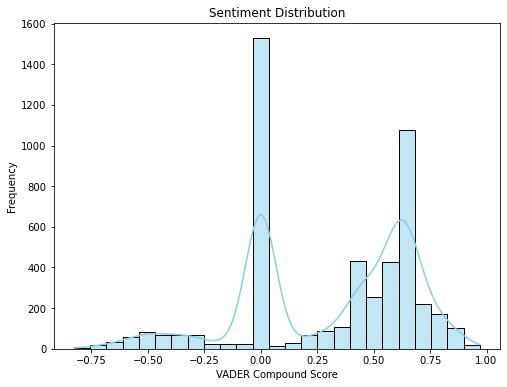

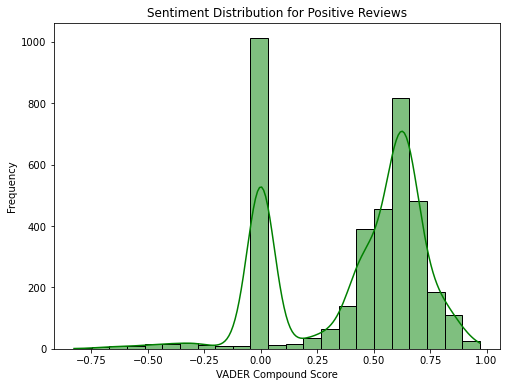

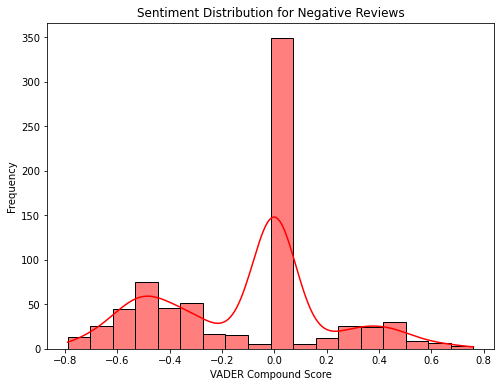

In [68]:
# Vectorize the text data using CountVectorizer

vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['Summary'])

# Calculate VADER sentiment scores for the 'Summary' column

analyzer = SentimentIntensityAnalyzer()
vader_scores = df['Summary'].apply(lambda x: analyzer.polarity_scores(x))
df['VADER Compound Score'] = vader_scores.apply(lambda x: x['compound'])

# Plot sentiment distribution

plt.figure(figsize=(8, 6))
sns.histplot(df['VADER Compound Score'], kde=True, color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('VADER Compound Score')
plt.ylabel('Frequency')
plt.show()

# Analyze sentiment based on star ratings

positive_reviews = df[df['Score'] >= 4]
negative_reviews = df[df['Score'] <= 2]

# Plot sentiment distribution for positive reviews

plt.figure(figsize=(8, 6))
sns.histplot(positive_reviews['VADER Compound Score'], kde=True, color='green')
plt.title('Sentiment Distribution for Positive Reviews')
plt.xlabel('VADER Compound Score')
plt.ylabel('Frequency')
plt.show()

# Plot sentiment distribution for negative reviews

plt.figure(figsize=(8, 6))
sns.histplot(negative_reviews['VADER Compound Score'], kde=True, color='red')
plt.title('Sentiment Distribution for Negative Reviews')
plt.xlabel('VADER Compound Score')
plt.ylabel('Frequency')
plt.show()

# Visualize common themes in reviews using previously trained LDA model

# Interpret of the findings in the next section


### Final Result Interpretation